# Figure 1: Behavior and Neural Discrimination plots

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os
import pingouin as pg

# Import project specific modules and enable automatic reloading
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as erp
from plotting import Fig, pretty_plot, FigMirror, fix_xlabels
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import helpers

### General helper functions

In [2]:
# Fix for only certain xticks appearing...
def fix_xticks(ax, days_plot = [-2, -1, 4, 1, 2, 7]):
    days_str = [str(e) for e in days_plot]
    plt.sca(ax)
    plt.xticks(list(range(len(days_plot))), days_str)


In [3]:
def get_group(row):
    if row.Mouse in err.learners:
        return "Learners"
    elif row.Mouse in err.nonlearners:
        return "Non-Learners"
    elif row.Mouse in err.ani_mice_good:
        return "ANI"
# get_group(DI_df.iloc[0,:])

### Set up plots

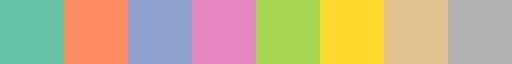

In [4]:
plt.get_cmap('Set2')

[8.5 6.5]


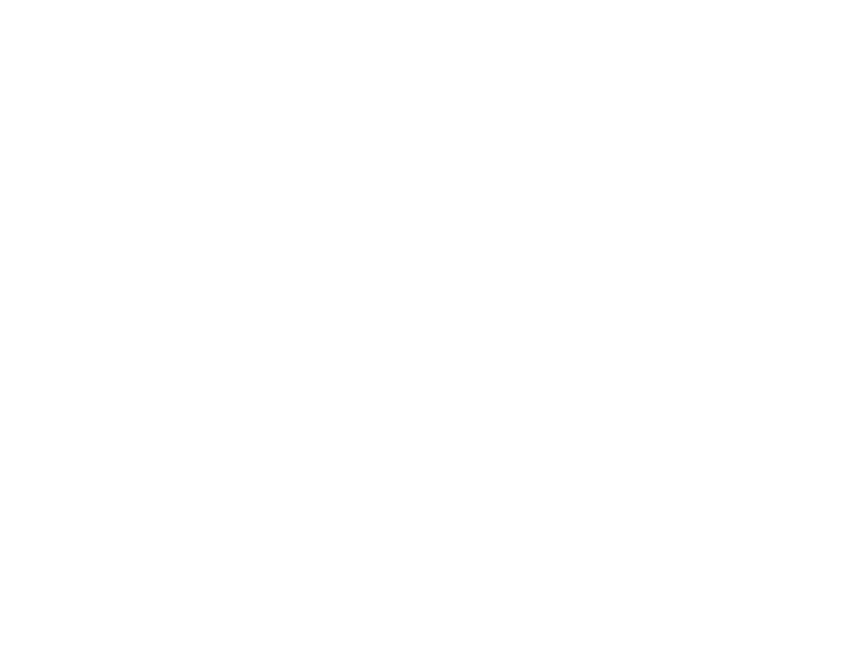

In [5]:
# Set up main figure plotting
%matplotlib ipympl
Fig1 = Fig(num=1, grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig1.fig.get_size_inches())

[8.5 6.5]


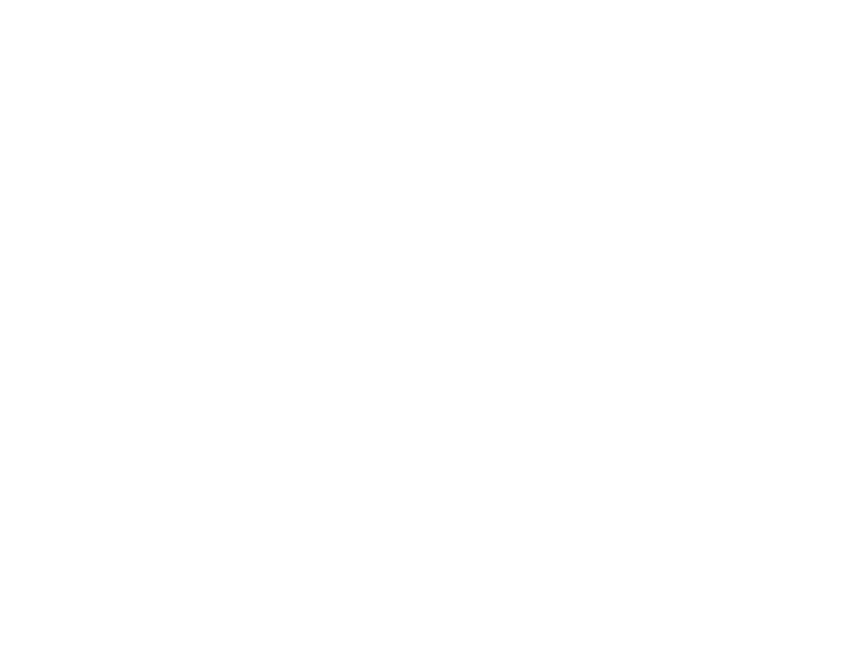

In [6]:
# Set up main figure stats companion plot and mirror it into FigMirror class
Fig1stats = Fig(num='Figure 1 stats', grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(Fig1stats.fig.get_size_inches())
Fig1comb = FigMirror(Fig1, Fig1stats)

[8.5 6.5]
[8.5 6.5]


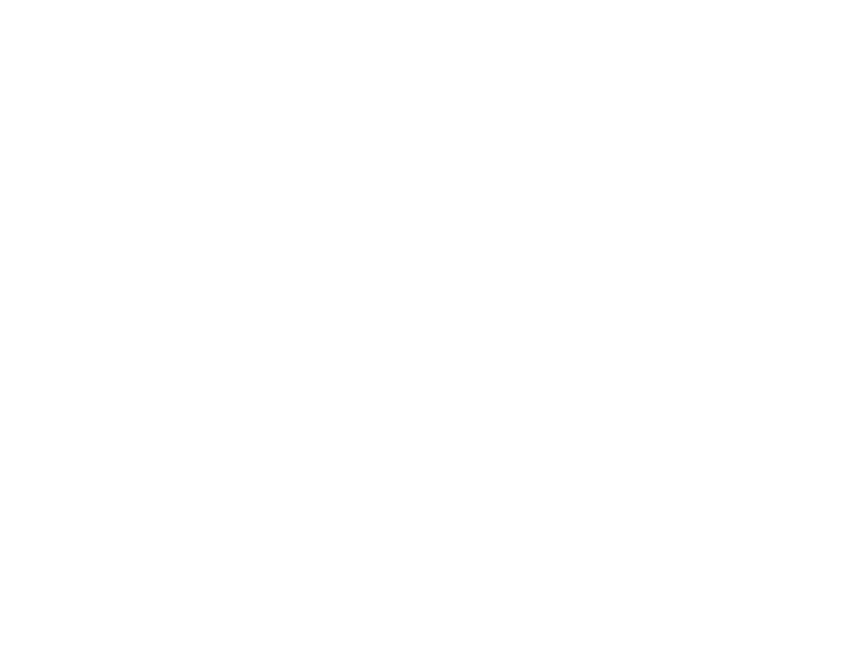

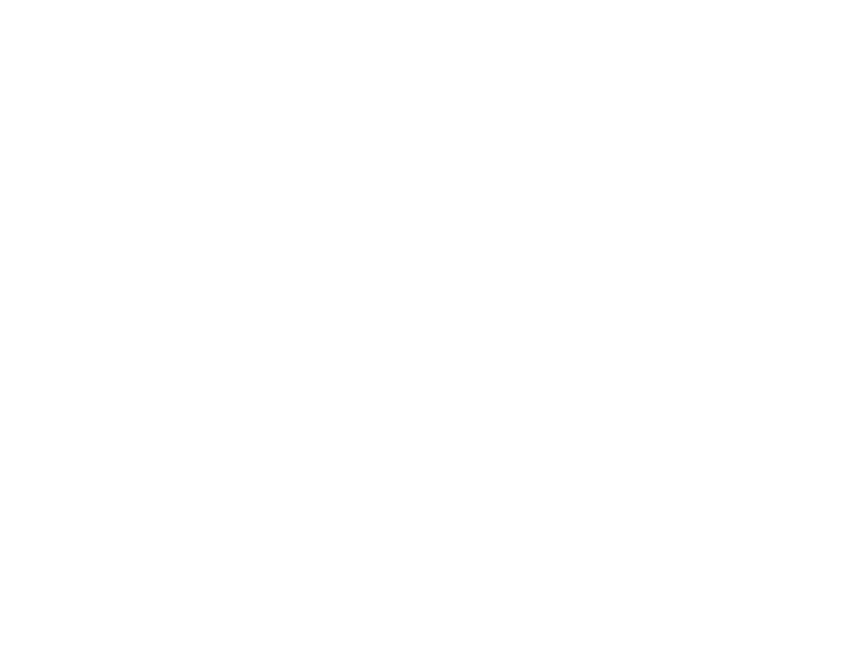

In [7]:
# Set up FigS1 and stats fig for it
FigS1 = Fig(num="Figure S1", grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(FigS1.fig.get_size_inches())
FigS1stats = Fig(num='Figure S1 stats', grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(FigS1stats.fig.get_size_inches())
FigS1comb = FigMirror(FigS1, FigS1stats)

In [8]:
# Designate Placeholders
aexp = Fig1.subplot(Fig1.gs[0, 0:2])
aexp.set_title('Exp. Outline Here')
aexp.axis('off')
plt.draw()

## Start with behavioral plots

### Aggregate freezing into DataFrame

In [9]:
df_list = []
days = [-2, -1, 4, 1, 2, 7]
arenas = ["Neutral", "Shock"]
for grp, grp_name in zip([err.learners, err.nonlearners, err.ani_mice_good], 
                         ["Learners", "Non-Learners", "ANI"]):
    fratios = erp.get_all_freezing(grp, day_des=days, arenas=arenas)
    mouse_names = np.repeat(np.array(grp)[None, :], fratios.shape[1], axis=0)
    days_mat = np.repeat(np.array(days)[:, None], fratios.shape[2], axis=1)
    for ida, arena in enumerate(arenas):
        df_list.append(pd.DataFrame({"Name": mouse_names.reshape(-1), "Arena": arena, "Day": days_mat.reshape(-1), 
                                     "Freeze Ratio": fratios[ida].reshape(-1), "Group" : grp_name}))

df_freeze = pd.concat(df_list, axis=0, ignore_index=True)
df_freeze["Day"] = pd.Categorical(df_freeze["Day"], [-2, -1, 4, 1, 2, 7])
df_freeze["Exp. Group"] = df_freeze.apply(lambda row: "Ctrl" if row["Group"] in ["Learners", "Non-Learners"] else "ANI", axis=1)
df_freeze.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Neutral 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


,Name,Arena,Day,Freeze Ratio,Group,Exp. Group
6,Marble24,Neutral,-1,0.053121,Learners,Ctrl
51,Marble06,Neutral,-1,0.081200,Non-Learners,Ctrl
68,Marble29,Shock,-2,0.239092,Non-Learners,Ctrl
66,Marble06,Shock,-2,0.173642,Non-Learners,Ctrl
31,Marble27,Shock,-1,0.069902,Learners,Ctrl


In [10]:
# Ditto but include day 0 to answer reviewer question on how freezing the day of training correlates with freezing in the future.
df_list = []
days = [-2, -1, 0, 4, 1, 2, 7]
arenas = ["Neutral", "Shock"]
for grp, grp_name in zip([err.learners, err.nonlearners, err.ani_mice_good], 
                         ["Learners", "Non-Learners", "ANI"]):
    fratios = erp.get_all_freezing(grp, day_des=days, arenas=arenas)
    mouse_names = np.repeat(np.array(grp)[None, :], fratios.shape[1], axis=0)
    days_mat = np.repeat(np.array(days)[:, None], fratios.shape[2], axis=1)
    for ida, arena in enumerate(arenas):
        df_list.append(pd.DataFrame({"Name": mouse_names.reshape(-1), "Arena": arena, "Day": days_mat.reshape(-1), 
                                     "Freeze Ratio": fratios[ida].reshape(-1), "Group" : grp_name}))

df_freeze0 = pd.concat(df_list, axis=0, ignore_index=True)
df_freeze0["Day"] = pd.Categorical(df_freeze0["Day"], [-2, -1, 0, 4, 1, 2, 7])
df_freeze0["Exp. Group"] = df_freeze0.apply(lambda row: "Ctrl" if row["Group"] in ["Learners", "Non-Learners"] else "ANI", axis=1)
df_freeze0.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181128_1_openfield: nbadpts = 50 max_in_a_row = 12
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180419_1_openfield: nbadpts = 13 max_in_a_row = 5
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Neutral 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble19/20180926_2_fcbox: nbadpts = 15 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble20_10Hz/20181010_1_op

,Name,Arena,Day,Freeze Ratio,Group,Exp. Group
143,Marble17,Shock,0,0.046809,ANI,ANI
9,Marble12,Neutral,0,0.053050,Learners,Ctrl
5,Marble12,Neutral,-1,0.176991,Learners,Ctrl
161,Marble20,Shock,2,0.037400,ANI,ANI
39,Marble27,Shock,0,0.051064,Learners,Ctrl


### Figure 1J and S1H-I: Does freezing on Day 0 correlate with freezing at later time points?

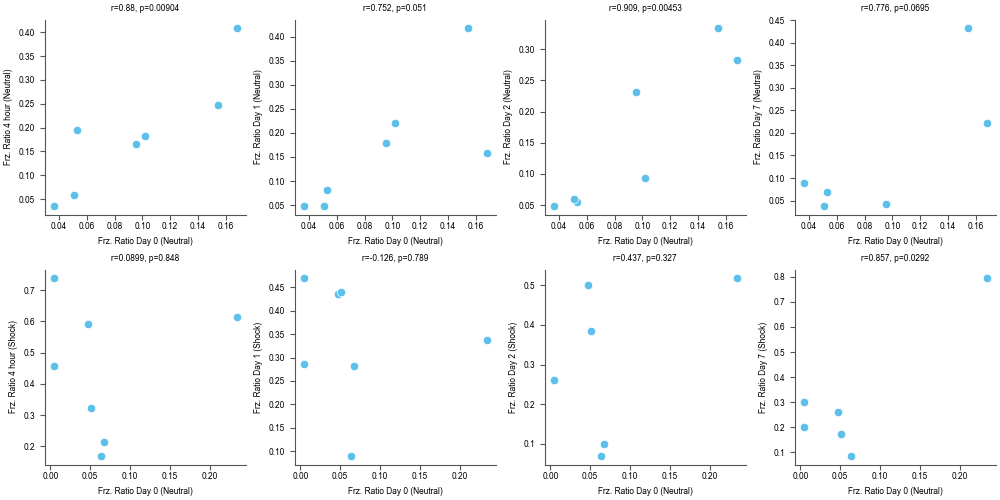

In [11]:
_, ax = plt.subplots(2, 4, figsize=(10, 5))

get_sesh_str = lambda sesh_name : "4 hour" if sesh_name == 4 else f"Day {sesh_name}"
for ida, (arow, arena) in enumerate(zip(ax, ["Neutral", "Shock"])):
    df_arena_rs = df_freeze0[(df_freeze0.Arena == arena) & (df_freeze0.Group != "ANI")].pivot(index="Name", columns="Day", values="Freeze Ratio")
    for idd, (acol, day) in enumerate(zip(arow, [4, 1, 2, 7])):
        ax_for_fig = FigS1.subplot(FigS1.gs[2 + ida, idd])
        for a in [acol, ax_for_fig]:
            # Plot
            sns.scatterplot(data=df_arena_rs, x=0, y=day, ax=a)
            a.set_xlabel("Frz. Ratio Day 0 (Neutral)")
            a.set_ylabel(f"Frz. Ratio {get_sesh_str(day)} ({arena})")
            
            # Calculate correlation
            corr_stats = pg.corr(df_arena_rs[0], df_arena_rs[day])
            a.set_title(f"r={corr_stats.r.values[0]:0.3g}, p={corr_stats['p-val'].values[0]:0.3g}")
            # a.set_xlim([0.02, 0.45])
            # if (arena != "Shock") or (day != 4):
            #     a.set_ylim([0.02, 0.55])
    

#### Ditto but for days before shock

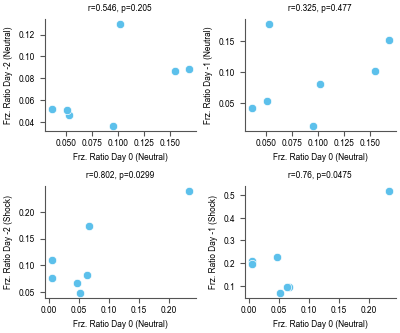

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(4, 5*2/3))

get_sesh_str = lambda sesh_name : "4 hour" if sesh_name == 4 else f"Day {sesh_name}"
for ida, (arow, arena) in enumerate(zip(ax, ["Neutral", "Shock"])):
    df_arena_rs = df_freeze0[(df_freeze0.Arena == arena) & (df_freeze0.Group != "ANI")].pivot(index="Name", columns="Day", values="Freeze Ratio")
    for idd, (a, day) in enumerate(zip(arow, [-2, -1])):
        # Plot
        sns.scatterplot(data=df_arena_rs, x=0, y=day, ax=a)
        a.set_xlabel("Frz. Ratio Day 0 (Neutral)")
        a.set_ylabel(f"Frz. Ratio {get_sesh_str(day)} ({arena})")
        
        # Calculate correlation
        corr_stats = pg.corr(df_arena_rs[0], df_arena_rs[day])
        a.set_title(f"r={corr_stats.r.values[0]:0.3g}, p={corr_stats['p-val'].values[0]:0.3g}")
        # a.set_xlim([0.02, 0.45])
        # if (arena != "Shock") or (day != 4):
        #     a.set_ylim([0.02, 0.55])

fig.savefig('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Reviewer_Fig_day0frz_vs_before.pdf')

### S1A - Control mice freezing

In [13]:
# Define errorbar function explicitly - error in seaborn
calc_std = lambda frz: (np.nanmean(frz) - np.nanstd(frz), np.nanmean(frz) + np.nanstd(frz)) 

In [14]:
# Plot Control mice behavior - dump into supplemental.
axc, astatsc = FigS1comb.subplot(341)

sns.stripplot(data=df_freeze[df_freeze["Exp. Group"] == "Ctrl"], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3, 
                  size=4, linewidth=0.4, edgecolor='w', ax=axc)
sns.pointplot(data=df_freeze[df_freeze["Exp. Group"] == "Ctrl"], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3,
              errorbar=calc_std, markersize=0,linewidth=1.5, ax=axc, legend=False)
fix_xlabels(axc, rotate=True)
axc.set_title("Ctrl Group")
axc.set_xlabel("")
axc.set_ylim([-0.025, 0.85])

(-0.025, 0.85)

In [15]:
# Calculate freezing ratio for controls
figc2, axc2, fratio_cont = erp.plot_all_freezing(err.control_mice_good, s=9, xoffset=0.1)
plt.close(figc2)
tstatc, ptc = s.ttest_ind((fratio_cont[1, 0:2, :] - fratio_cont[0, 0:2, :]).reshape(-1),
                           (fratio_cont[1, 3:5, :] - fratio_cont[0, 3:5, :]).reshape(-1), nan_policy='omit')
# print(ptc/2)
# print(tstatc)

# # astatsc = Fig1stats.subplot(343)
# astatsc.text(0.1, 0.7, 'Control Mice')
# astatsc.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
# astatsc.text(0.1, 0.5, f'p={ptc/2:0.3g}')
# astatsc.text(0.1, 0.4, f'tstat={tstatc:0.3g}')
# astatsc.axis('off')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


### 1D: ANI Mice freezing

In [16]:
# Plot ANI mice behavior
axa, astatsa = Fig1comb.subplot(447)

sns.stripplot(data=df_freeze[df_freeze["Exp. Group"] == "ANI"], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3, 
                  size=4, linewidth=0.4, edgecolor='w', ax=axa)
sns.pointplot(data=df_freeze[df_freeze["Exp. Group"] == "ANI"], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3,
              errorbar=calc_std, markersize=0,linewidth=1.5, ax=axa, legend=False)
fix_xlabels(axa, rotate=True)
axa.set_title("ANI Group")
axa.set_xlabel("")
axa.set_ylim([-0.025, 0.85])


(-0.025, 0.85)

In [17]:
# Non-significant increase in freezing for ANI mice from before to after (days -2/-1 to days 1/2, and day -1 to day 1)

# Calculate freezing ratios
figa, axa, fratio_ani = erp.plot_all_freezing(err.ani_mice_good, s=9, xoffset=0.1)
plt.close(figa)

tstata, pta = s.ttest_ind((fratio_ani[1, 0:2, :] - fratio_ani[0, 0:2, :]).reshape(-1),
                           (fratio_ani[1, 3:5, :] - fratio_ani[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(f"Days -2/-1 vs Days 1/2: pval={pta/2:.3g}, tstat={tstata:.3g}")
print(pta/2)
print(tstata)

astatsa.text(0.1, 0.7, 'ANI Mice')
astatsa.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsa.text(0.1, 0.5, f'p={pta/2:0.3g}')
astatsa.text(0.1, 0.4, f'tstat={tstata:0.3g}')

tstata, pta = s.ttest_rel((fratio_ani[1, 1, :] - fratio_ani[0, 1, :]).reshape(-1),
                           (fratio_ani[1, 3, :] - fratio_ani[0, 3, :]).reshape(-1), nan_policy='omit')
astatsa.text(0.1, 0.3, 'paired one-way t-test day -1 to day 1', fontdict=None)
astatsa.text(0.1, 0.2, f"pval={pta/2:.3g}, tstat={tstata:.3g}")
print(f"Day -1 vs Days 1: pval={pta/2:.3g}, tstat={tstata:.3g}")

astatsa.axis('off')

for id, day in zip([4, 5], [2, 7]):
    tstata, pta = s.ttest_rel((fratio_ani[1, 1, :] - fratio_ani[0, 1, :]).reshape(-1),
                               (fratio_ani[1, id, :] - fratio_ani[0, id, :]).reshape(-1), nan_policy='omit')
    print(f"Day -1 to Day {day} one-way t-test paired: pval={pta/2:.3g}, tstat={tstata:.3g}")

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6
Days -2/-1 vs Days 1/2: pval=0.112, tstat=-1.26
0.11178530200553742
-1.2605402424159724
Day -1 vs Days 1: pval=0.219, tstat=-0.859
Day -1 to Day 2 one-way t-test paired: pval=0.253, tstat=-0.729
Day -1 to Day 7 one-way t-test paired: pval=0.0601, tstat=-1.97


### Calculate Discrimination indices
Also peform sanity checks

In [18]:
# Calculate Discrimination Index (DI) ratios for day 1-2
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

In [19]:
# Here are all the DIs for controls averaged across days 1 and 2 - note that this metric can distort things as 
# animal 3, for example, freezes very little in either arena and so is a non-learner even though he has a lower DI
# value, while animal 1 and animal 3 freeze in both arenas and are also a non-learner.
DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0)

array([-0.10379693, -0.39033887, -0.21642609, -0.59563518,         nan,
       -0.71391564, -0.36638349, -0.06170731])

In [20]:
# Sanity checks
from itertools import compress
# Print out learners vs. non-learners
learn_bool = DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0) < learning_cutoff
# learners = err.control_mice_good[learn_bool]
learners = list(compress(err.control_mice_good, learn_bool))
nonlearners = list(compress(err.control_mice_good, ~learn_bool))
print('Learners')
print(learners)
# Check that matches what's in your code
print(err.learners)

# Note that Marble 14 can't really be designated either way since his open field behavioral data was corrupted on
# those days. However, he would likely be a non-learner since he barely freezes in the shock arena after shock.
print('Non-Learners')
print(nonlearners)
# Check that matches what's in your code
print(err.nonlearners)

Learners
['Marble07', 'Marble12', 'Marble24', 'Marble27']
['Marble07', 'Marble12', 'Marble24', 'Marble27']
Non-Learners
['Marble06', 'Marble11', 'Marble14', 'Marble29']
['Marble06', 'Marble11', 'Marble29']


### 1B: Learner and Non-Learner freezing plots

In [21]:
# Plot non-learners and learners
axlrn, astatslrn = Fig1comb.subplot(443)
flrn, axlrn, fratio_lrn = erp.plot_all_freezing(err.learners, ax=axlrn, s=9, xoffset=0.1)
plt.close(flrn)
# axlrn.set_title('Learners')
# axlrn.set_ylim([-0.025, 0.80])

axnlrn, astatsnl = Fig1comb.subplot(444)
fnl, axnlrn, fratio_nl = erp.plot_all_freezing(err.nonlearners, ax=axnlrn, s=9, xoffset=0.1)
plt.close(fnl)
# axnlrn.set_ylim([-0.025, 0.80])
# axnlrn.set_ylabel('')
# axnlrn.set_title('Non-Learners')

# Define errorbar function explicitly - error in seaborn
calc_std = lambda frz: (np.nanmean(frz) - np.nanstd(frz), np.nanmean(frz) + np.nanstd(frz)) 
for a, gname in zip([axlrn, axnlrn], ["Learners", "Non-Learners"]):
    sns.stripplot(data=df_freeze[df_freeze.Group == gname], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3, 
                  size=4, linewidth=0.4, edgecolor='w', ax=a)
    # sns.pointplot(data=df_freeze[df_freeze.Group == gname], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3,
    #               errorbar="sd", markersize=0,linewidth=1.5, ax=a, legend=False)
    sns.pointplot(data=df_freeze[df_freeze.Group == gname], x="Day", y="Freeze Ratio", hue="Arena", dodge=0.3,
                  errorbar=calc_std, markersize=0,linewidth=1.5, ax=a, legend=False)
    fix_xlabels(a, rotate=True)
    a.set_xlabel("")
    a.set_ylim([-0.025, 0.85])
    a.set_title(gname)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


In [22]:
# Highly sig freezing for Learners
tstatlrn, ptlrn = s.ttest_ind((fratio_lrn[1, 0:2, :] - fratio_lrn[0, 0:2, :]).reshape(-1),
                           (fratio_lrn[1, 3:5, :] - fratio_lrn[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(f"Days -2/-1 Learners one-way t-test un-paired: pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")

astatslrn.text(0.1, 0.7, 'Learners')
astatslrn.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatslrn.text(0.1, 0.5, f'p={ptlrn/2:0.3g}')
astatslrn.text(0.1, 0.4, f'tstat={tstatlrn:0.3g}')

tstatlrn, ptlrn = s.ttest_rel((fratio_lrn[1, 1, :] - fratio_lrn[0, 1, :]).reshape(-1),
                           (fratio_lrn[1, 3, :] - fratio_lrn[0, 3, :]).reshape(-1), nan_policy='omit')
print(f"Day -1 to Day 1 one-way t-test paired: pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")
astatslrn.text(0.1, 0.3, 'paired one-way t-test day -1 to days 1', fontdict=None)
astatslrn.text(0.1, 0.2, f"pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")

for id, day in zip([4, 5], [2, 7]):
    tstatlrn, ptlrn = s.ttest_rel((fratio_lrn[1, 1, :] - fratio_lrn[0, 1, :]).reshape(-1),
                               (fratio_lrn[1, id, :] - fratio_lrn[0, id, :]).reshape(-1), nan_policy='omit')
    print(f"Day -1 to Day {day} one-way t-test paired: pval={ptlrn/2:.3g}, tstat={tstatlrn:.3g}")

astatslrn.axis('off')

Days -2/-1 Learners one-way t-test un-paired: pval=1.3e-05, tstat=-6.13
Day -1 to Day 1 one-way t-test paired: pval=0.00045, tstat=-13.4
Day -1 to Day 2 one-way t-test paired: pval=0.0127, tstat=-4.15
Day -1 to Day 7 one-way t-test paired: pval=0.0611, tstat=-2.14


(0.0, 1.0, 0.0, 1.0)

In [23]:
# Non-sig freezing for NonLearners
tstatnl, ptnl = s.ttest_ind((fratio_nl[1, 0:2, :] - fratio_nl[0, 0:2, :]).reshape(-1),
                           (fratio_nl[1, 3:5, :] - fratio_nl[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(f"Days -2/-1 to 1/2 Non-Learners one-way t-test un-paired: pval={ptnl/2:.3g}, tstat={tstatnl:.3g}")

astatsnl.text(0.1, 0.7, 'Non-Learners')
astatsnl.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsnl.text(0.1, 0.5, f'p={ptnl/2:0.3g}')
astatsnl.text(0.1, 0.4, f'tstat={tstatnl:0.3g}')

yoff = 0.3
for id, day in zip([3, 4, 5], [1, 2, 7]):
    tstatnl, ptnl = s.ttest_rel((fratio_nl[1, 1, :] - fratio_nl[0, 1, :]).reshape(-1),
                           (fratio_nl[1, id, :] - fratio_nl[0, id, :]).reshape(-1), nan_policy='omit')
    astatsnl.text(0.1, yoff, f"Day -1 to {day} Non-Learners one-way t-test paired: pval={ptnl/2:.3g}, tstat={tstatnl:.3g}")
    yoff -= 0.1
    print(f"Day -1 to {day} Non-Learners one-way t-test paired: pval={ptnl/2:.3g}, tstat={tstatnl:.3g}")

astatsnl.axis('off')

Days -2/-1 to 1/2 Non-Learners one-way t-test un-paired: pval=0.171, tstat=0.997
Day -1 to 1 Non-Learners one-way t-test paired: pval=0.249, tstat=0.819
Day -1 to 2 Non-Learners one-way t-test paired: pval=0.192, tstat=1.1
Day -1 to 7 Non-Learners one-way t-test paired: pval=0.061, tstat=5.15


(0.0, 1.0, 0.0, 1.0)

In [24]:
## Run stats - group of interests are Learners vs. ANI, other comparisons included for completeness.
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_ani_nl_1sidedt_specific = np.ones(6)*np.nan
pval_lrn_nl_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw lrn and ani directly, no accounting for specificity
for id in range(0, 6):
    
    # ANI vs Learners
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # ANI vs Non-Learners
    stats_nla, pval_nla = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # Learners vs Non-Learners
    stats_lrnnl, pval_lrnnl = s.ttest_ind(fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_lrn[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2
        
    if stats_nla < 0:
        pval_ani_nl_1sidedt_specific[id] = pval_nla/2
    elif stats_nla > 0:
        pval_ani_nl_1sidedt_specific[id] = 1 - pval_nla/2
       
    if stats_lrnnl < 0:
        pval_lrn_nl_1sidedt_specific [id] = pval_lrnnl/2
    elif stats_lrnnl > 0:
        pval_lrn_nl_1sidedt_specific [id] = 1 - pval_lrnnl/2


In [25]:
# Add between group stats to stats figure
abw_grp_stats = Fig1stats.subplot(Fig1stats.gs[0, 0:2])
days = [-2, -1, 4, 1, 2, 7]
abw_grp_stats.text(0.1, 0.8, '1-sided t-test bw groups')
abw_grp_stats.text(0.1, 0.7, 'Learners v ANI shock arena only')
abw_grp_stats.text(0.1, 0.6, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_bwgroup_1sidedt_shockonly)])

abw_grp_stats.text(0.1, 0.5, 'ANI vs Non-learners shock-open freezing')
abw_grp_stats.text(0.1, 0.4, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_ani_nl_1sidedt_specific)])

abw_grp_stats.text(0.1, 0.3, 'Non-Learners vs. Learners')
abw_grp_stats.text(0.1, 0.2, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_lrn_nl_1sidedt_specific)])

Text(0.1, 0.2, "['-2: p=0.894', '-1: p=0.747', '4: p=0.22', '1: p=0.00391', '2: p=0.0267', '7: p=0.657']")

### S1C-D: DI between arena same day vs. within arena across days relationship (S1C at one day lag)

In [26]:
# Get overlap ratios and DIs for all sessions days -2/-1 and days 1/2
overlap_win_all, overlap_bw_all = [], []
DI_win_all, DI_bw_all, mouse_all, did_all = [], [], [], []
day_pairs = [[-2, -1], [1, 2]]
for mouse in err.all_mice_good:
    # Get turnover between arenas on days -2 and -1 and average them
    # o_bw_temp = []
    # o_win_temp = []
    # DI_bw_temp, DI_win_temp = [], []
    for idd, days in enumerate(day_pairs):
        o_bw_temp, DI_bw_temp = [], []
        for day in days:
            _, _, oboth, _, _ = pfs.get_overlap(mouse, 'Open', day, 'Shock', day, batch_map=True)
            o_bw_temp.append(oboth)
            DIneurons = discr.get_DI_scores(mouse, 'Open', day, 'Shock', day, batch_map_use=True)
            DI_bw_temp.append(np.mean(np.abs(DIneurons)))
        overlap_bw_all.append(np.nanmean(o_bw_temp))
        DI_bw_all.append(np.nanmean(DI_bw_temp))

        # Get turnover within each arena from days -2 to -1 and average them
        o_win_temp, DI_win_temp = [], []
        for arena in ['Shock', 'Open']:
            _, _, oboth, _, _ = pfs.get_overlap(mouse, arena, days[0], arena, days[1], 
                                                                 batch_map=True)
            o_win_temp.append(oboth)
            DIneurons = discr.get_DI_scores(mouse, 'Open', days[0], 'Shock', days[1], batch_map_use=True)
            DI_win_temp.append(np.mean(np.abs(DIneurons)))
        overlap_win_all.append(np.nanmean(o_win_temp))
        DI_win_all.append(np.nanmean(DI_win_temp))
        mouse_all.append(mouse)
        did_all.append(idd)
        
ax_olap_t_v_arena, ax_olap_t_v_arena_stats = FigS1comb.subplot(345)
ax_olap_t_v_arena.plot(overlap_win_all, overlap_bw_all, '.')
ax_olap_t_v_arena.set_ylabel('Cell Overlap w/in arenas (1 day lag)')
ax_olap_t_v_arena.set_xlabel('Cell Overlap b/w arenas (same day)')
sns.despine(ax=ax_olap_t_v_arena)

ax_DI_t_v_arena, ax_DI_t_v_arena_stats = Fig1comb.subplot(448)
ax_DI_t_v_arena.plot(DI_win_all, DI_bw_all, '.')
ax_DI_t_v_arena.set_ylabel(r"$\overline{|DI_{neural}|}$ Arena")
ax_DI_t_v_arena.set_xlabel(r"$\overline{|DI_{neural}|}$ Time")
sns.despine(ax=ax_DI_t_v_arena)

DIvsdf = pd.DataFrame({"Mouse": mouse_all, "day_id": did_all, "DI_win": DI_win_all, "DI_bw": DI_bw_all})
olapvsdf = pd.DataFrame({"Mouse": mouse_all, "day_id": did_all, "olap_win": overlap_win_all, "olap_bw": overlap_bw_all})

placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_33086/530287383.py:18: RuntimeWarning: Mean of empty slice
  DI_bw_all.append(np.nanmean(DI_bw_temp))


placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow
placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_33086/530287383.py:29: RuntimeWarning: Mean of empty slice
  DI_win_all.append(np.nanmean(DI_win_temp))


#### Stats on overlap correlations between sessions or across days
All methods are highly significant

Old method - combine all points (multiple points for each mouse included, n.g.)

In [27]:
# Super significant correlation with all the points
r, p = s.stats.spearmanr(overlap_win_all, overlap_bw_all)
print('\033[4mSpearman Correlation (overlap ratio) \033[0m')
print('r = ' + str(r))
print('p = ' + str(p))
ax_olap_t_v_arena_stats.text(0.1, 0.9, '\033[4mSpearman Correlation (overlap ratio) \033[0m')
ax_olap_t_v_arena_stats.text(0.1, 0.8, 'r = ' + str(r))
ax_olap_t_v_arena_stats.text(0.1, 0.7, 'p = ' + str(p))
sns.despine(ax=ax_olap_t_v_arena_stats)

rdi, pdi = s.stats.spearmanr(np.array(DI_win_all)[~np.isnan(DI_win_all)], np.array(DI_bw_all)[~np.isnan(DI_win_all)])
print('\033[4mSpearman Correlation (DI ratio) \033[0m')
print('r = ' + str(rdi))
print('p = ' + str(pdi))
ax_DI_t_v_arena_stats.text(0.1, 0.9, '\033[4mSpearman Correlation (DI ratio) \033[0m')
ax_DI_t_v_arena_stats.text(0.1, 0.8, 'r = ' + str(rdi))
ax_DI_t_v_arena_stats.text(0.1, 0.7, 'p = ' + str(pdi))

Spearman Correlation (overlap ratio) 
r = 0.8147008547008547
p = 4.058278462992159e-07
Spearman Correlation (DI ratio) 
r = 0.816923076923077
p = 6.288362327910512e-07


/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_33086/2893604544.py:2: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  r, p = s.stats.spearmanr(overlap_win_all, overlap_bw_all)
/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_33086/2893604544.py:11: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  rdi, pdi = s.stats.spearmanr(np.array(DI_win_all)[~np.isnan(DI_win_all)], np.array(DI_bw_all)[~np.isnan(DI_win_all)])


Text(0.1, 0.7, 'p = 6.288362327910512e-07')

OK - take each day independently

Very significant each day.

In [28]:
for did in DIvsdf.day_id.unique():
    print(pg.pairwise_corr(data=DIvsdf[DIvsdf.day_id == did], columns=["DI_win", "DI_bw"]))

        X      Y   method alternative   n         r         CI95%     p-unc  \
0  DI_win  DI_bw  pearson   two-sided  13  0.908133  [0.71, 0.97]  0.000018   

       BF10     power  
0  1180.473  0.998397  
        X      Y   method alternative   n         r         CI95%    p-unc  \
0  DI_win  DI_bw  pearson   two-sided  12  0.697848  [0.21, 0.91]  0.01162   

    BF10     power  
0  6.114  0.762743  


Best - run Linear Mixed Model
dependent variable = DI/olap between days
Fixed effect = DI/olap within days (same arena)
Random effect = day pair (before or after learning)

Also significant.

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("DI_win ~ DI_bw", DIvsdf[~np.isnan(DIvsdf.DI_bw)], groups=DIvsdf[~np.isnan(DIvsdf.DI_bw)].Mouse)
mdf = md.fit()
ax_olap_t_v_arena_stats.text(0.1, 0.9, "DI win vs b/w stats below")
ax_olap_t_v_arena_stats.text(0.1, 0.8, mdf.summary())
ax_olap_t_v_arena_stats.text(0.1, 0.7, "pvalues below")
ax_olap_t_v_arena_stats.text(0.1, 0.4, mdf.pvalues)
print(mdf.summary())
print(mdf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DI_win 
No. Observations: 25      Method:             REML   
No. Groups:       13      Scale:              0.0003 
Min. group size:  1       Log-Likelihood:     53.9516
Max. group size:  2       Converged:          Yes    
Mean group size:  1.9                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.094    0.063 1.481 0.139 -0.030  0.218
DI_bw        0.766    0.181 4.232 0.000  0.411  1.121
Group Var    0.000    0.024                          

Intercept    0.138529
DI_bw        0.000023
Group Var    0.386983
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


#### Same for overlap

In [30]:
for did in olapvsdf.day_id.unique():
    print(pg.pairwise_corr(data=olapvsdf[olapvsdf.day_id == did], columns=["olap_win", "olap_bw"]))

          X        Y   method alternative   n         r         CI95%  \
0  olap_win  olap_bw  pearson   two-sided  13  0.738998  [0.32, 0.92]   

      p-unc    BF10    power  
0  0.003901  14.399  0.87017  
          X        Y   method alternative   n         r         CI95%  \
0  olap_win  olap_bw  pearson   two-sided  13  0.733363  [0.31, 0.91]   

      p-unc    BF10     power  
0  0.004336  13.228  0.861603  


In [31]:
md = smf.mixedlm("olap_win ~ olap_bw", olapvsdf[~np.isnan(olapvsdf.olap_bw)], groups=olapvsdf[~np.isnan(olapvsdf.olap_bw)].Mouse)
mdf = md.fit()
ax_DI_t_v_arena_stats.text(0.1, 0.9, "olap win vs b/w stats below")
ax_DI_t_v_arena_stats.text(0.1, 0.8, mdf.summary())
ax_DI_t_v_arena_stats.text(0.1, 0.7, "pvalues below")
ax_DI_t_v_arena_stats.text(0.1, 0.4, mdf.pvalues)
print(mdf.summary())
print(mdf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: olap_win
No. Observations: 26      Method:             REML    
No. Groups:       13      Scale:              0.0027  
Min. group size:  2       Log-Likelihood:     30.8031 
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.054    0.049 1.088 0.276 -0.043  0.151
olap_bw       0.942    0.133 7.062 0.000  0.681  1.204
Group Var     0.002    0.038                          

Intercept    2.764864e-01
olap_bw      1.642382e-12
Group Var    2.988743e-01
dtype: float64


/Users/nkinsky/mambaforge/envs/eraser/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### DI ratio plots by group

In [32]:
# Calculate DI ratio for all groups
DI_lrn = (fratio_lrn[0] - fratio_lrn[1])/(fratio_lrn[0] + fratio_lrn[1])
DI_nl = (fratio_nl[0] - fratio_nl[1])/(fratio_nl[0] + fratio_nl[1])
DI_a = (fratio_ani[0] - fratio_ani[1])/(fratio_ani[0] + fratio_ani[1])
# Dump into nice dataframe
days = [-2, -1, 4, 1, 2, 7]
DI_all = []
days_all = []
grp_all = []
for DI, grp in zip([DI_lrn, DI_nl, DI_a], ['Learners', 'Non-Learners', 'ANI']):
    DI_all.extend(DI.reshape(-1))
    grp_all.extend([grp for _ in DI.reshape(-1)])
    days_all.extend(np.matlib.repmat(days, DI.shape[1], 1).T.reshape(-1))

DIdf = pd.DataFrame({'DI': DI_all, 'Day': days_all, 'Group': grp_all})

### Code/functions to get spatial information for all mice

In [33]:
def calc_DI(df_day, neutral_name: str in ["Open", "Neutral"] = "Neutral"):
    frz_neutral = df_day[df_day["Arena"] == neutral_name]["Frz. Ratio"].values[0]
    frz_shock = df_day[df_day["Arena"] == "Shock"]["Frz. Ratio"].values[0]
    DI = (frz_neutral - frz_shock) / (frz_neutral + frz_shock)
    
    return DI

In [34]:
def create_DI_df(fratio_df_in, neutral_name: str in ["Open", "Neutral"] = "Neutral", alpha_pf: float = 0.05):
    """Takes freeze ratio dataframe and converts it to a DataFrame with DI values + mean SI and event rate
    for that mouse in each arena.
    alpha_pf: all cells with p < alpha_pf are considered place fields"""

    # Add in Discrimination Index
    DI_df = fratio_df_in.groupby(["Mouse", "Day"], observed=False).apply(calc_DI, include_groups=False).reset_index()
    DI_df = DI_df.rename(columns={0: "DI"})

    # Loop through and get event rate and mutual information
    mi_shock, mi_open, mi_pf_shock, mi_pf_open = [], [], [], []
    er_shock, er_open = [], []
    di_neural, olap_neural = [], []
    for idr, row in DI_df.iterrows():
        if not np.isnan(row.DI):
            # Get spatial information and event rate in shock arena
            pfos = pf.load_pf(row["Mouse"], 'Shock', row["Day"])
            mi_s, _, _, _, _ = pf.spatinfo(pfos.tmap_us, pfos.runoccmap, pfos.PSAbool_align)
            mi_shock.append(np.nanmean(mi_s))
            mi_pf_shock.append(np.nanmean(np.array(mi_s)[np.array(pfos.pval) < alpha_pf]))
            event_rate_s, even_prob_s = helpers.get_eventrate(pfos.PSAbool_align, pfos.sr_image)
            er_shock.append(np.nanmean(event_rate_s))
        
            pfoo = pf.load_pf(row["Mouse"], 'Open', row["Day"])
            mi_o, _, _, _, _ = pf.spatinfo(pfoo.tmap_us, pfoo.runoccmap, pfoo.PSAbool_align)
            mi_open.append(np.nanmean(mi_o))
            mi_pf_open.append(np.nanmean(np.array(mi_o)[np.array(pfoo.pval) < alpha_pf]))
            event_rate_o, even_prob_o = helpers.get_eventrate(pfoo.PSAbool_align, pfoo.sr_image)
            er_open.append(np.nanmean(event_rate_o))

            di_neural_temp = discr.get_DI_scores(row["Mouse"], 'Open', row["Day"], 'Shock', row["Day"])
            _, _, overlap, _, _ = pfs.get_overlap(row["Mouse"], 'Shock', row["Day"], 'Open', row["Day"])
            di_neural.append(np.mean(np.abs(di_neural_temp)))
            olap_neural.append(overlap)
        else:
            mi_shock.append(np.nan)
            mi_pf_shock.append(np.nan)
            er_shock.append(np.nan)
            mi_open.append(np.nan)
            mi_pf_open.append(np.nan)
            er_open.append(np.nan)
            di_neural.append(np.nan)
            olap_neural.append(np.nan)
        
    DI_df["MI All (Neutral)"] = mi_open
    DI_df["MI All (Shock)"] = mi_shock
    DI_df["MI PF (Neutral)"] = mi_pf_open
    DI_df["MI PF (Shock)"] = mi_pf_shock
    DI_df["Event Rate (Neutral)"] = er_open
    DI_df["Event Rate (Shock)"] = er_shock
    DI_df["DI Neural"] = di_neural
    DI_df["Overlap Ratio"] = olap_neural

    return DI_df
fratio_all = erp.get_all_freezing(err.learners, day_des=[-2, -1, 1, 2], arenas=["Open", "Shock"])
fratio_df = erp.fratio_to_df(fratio_all, err.learners, days=[-2, -1, 1, 2], arenas=["Neutral", "Shock"])
DI_df = create_DI_df(fratio_df)
DI_df.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

,Mouse,Day,DI,MI All (Neutral),MI All (Shock),MI PF (Neutral),MI PF (Shock),Event Rate (Neutral),Event Rate (Shock),DI Neural,Overlap Ratio
10,Marble24,1,-0.810802,0.015300,0.017325,0.023342,0.031733,2.040270,1.737210,0.418410,0.251376
4,Marble12,-2,-0.405267,0.023364,0.014847,0.029246,0.021897,1.488422,1.339608,0.333681,0.386935
12,Marble27,-2,-0.151996,0.021296,0.013692,0.030126,0.019813,1.764018,1.684469,0.319441,0.517056
2,Marble07,1,-0.468069,0.015860,0.010895,0.023303,0.018024,1.671730,1.477026,0.347513,0.374841
1,Marble07,-1,-0.198552,0.015447,0.012283,0.023397,0.019291,1.603985,1.561788,0.376256,0.377252


### For reference only: Plot session means for reference - use hierarchical bootstrapping for final plots.
In `behavioral_and_neural_discrimination_bootstrap.ipynb`

In [35]:
alpha_pf = 0.05
days = [-2, -1, 4, 1, 2, 7]
DI_df = []
for mice, group_name in zip((err.learners, err.nonlearners, err.ani_mice_good),
                             ("Learners", "Non-Learners", "ANI")):
    fratio_all = erp.get_all_freezing(mice, day_des=days, arenas=["Open", "Shock"])
    fratio_df = erp.fratio_to_df(fratio_all, mice, days=days, arenas=["Neutral", "Shock"])
    df_temp = create_DI_df(fratio_df)
    df_temp["Group"] = group_name
    DI_df.append(df_temp)
DI_df = pd.concat(DI_df, axis=0).reset_index()
DI_df["Day"] = pd.Categorical(DI_df["Day"], [-2, -1, 4, 1, 2, 7])
DI_df.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: invalid value encountered in multiply
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarn

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

,index,Mouse,Day,DI,MI All (Neutral),MI All (Shock),MI PF (Neutral),MI PF (Shock),Event Rate (Neutral),Event Rate (Shock),DI Neural,Overlap Ratio,Group
26,2,Marble06,1,-0.123637,0.015425,0.013237,0.025811,0.022974,1.230374,1.421399,0.365441,0.247934,Non-Learners
63,21,Marble20,2,0.669664,0.016618,0.016704,0.026200,0.022707,2.232980,2.376584,0.355217,0.427273,ANI
8,8,Marble12,1,-0.559866,0.020085,0.012422,0.029383,0.018925,1.394127,1.430898,0.389342,0.272973,Learners
43,1,Marble17,-1,0.809421,0.018247,0.014495,0.027325,0.020943,1.667979,1.576753,0.307986,0.339259,ANI
66,24,Marble25,-2,-0.211492,0.018516,0.012148,0.025902,0.019422,1.386251,1.348191,0.318777,0.510010,ANI


<Axes: xlabel='Group', ylabel='DI'>

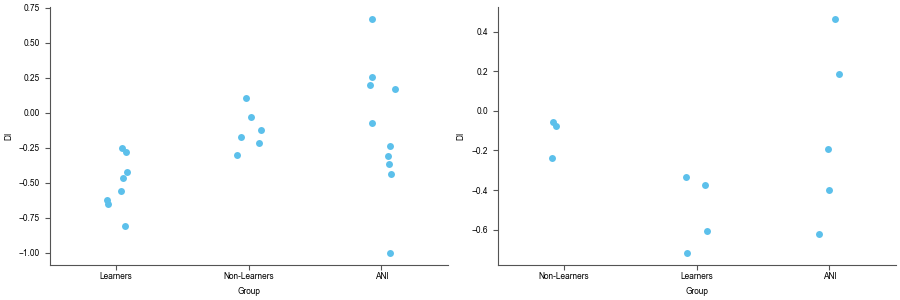

In [36]:
_, ax = plt.subplots(1, 2, figsize=(9, 3))
sns.stripplot(data=DI_df[(DI_df.Day == 1) | (DI_df.Day == 2)], x="Group", y="DI", ax=ax[0])
df_aft_mean = DI_df[(DI_df.Day == 1) | (DI_df.Day == 2)].groupby("Mouse").mean(numeric_only=True).reset_index()
df_aft_mean["Group"] = df_aft_mean.apply(get_group, axis=1)
sns.stripplot(data=df_aft_mean, x="Group", y="DI", ax=ax[1])

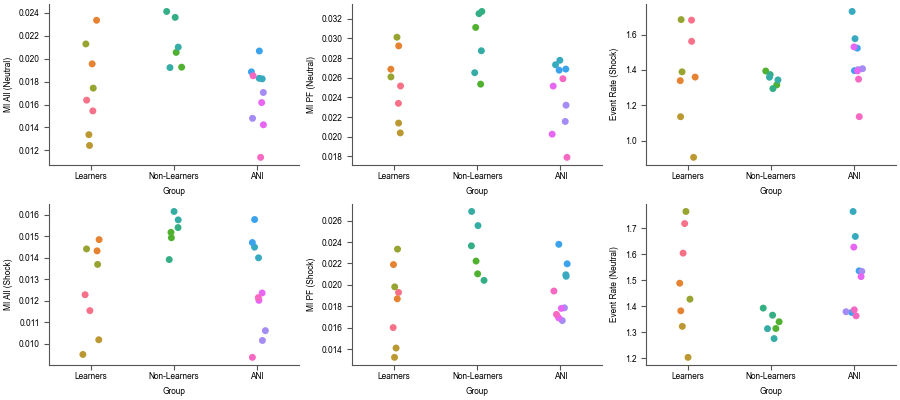

In [37]:
df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)]
_, ax = plt.subplots(2, 3, figsize=(9, 4))
for a, col in zip(ax.T.reshape(-1), ["MI All (Neutral)", "MI All (Shock)", "MI PF (Neutral)",
                                     "MI PF (Shock)", "Event Rate (Shock)", "Event Rate (Neutral)"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False)

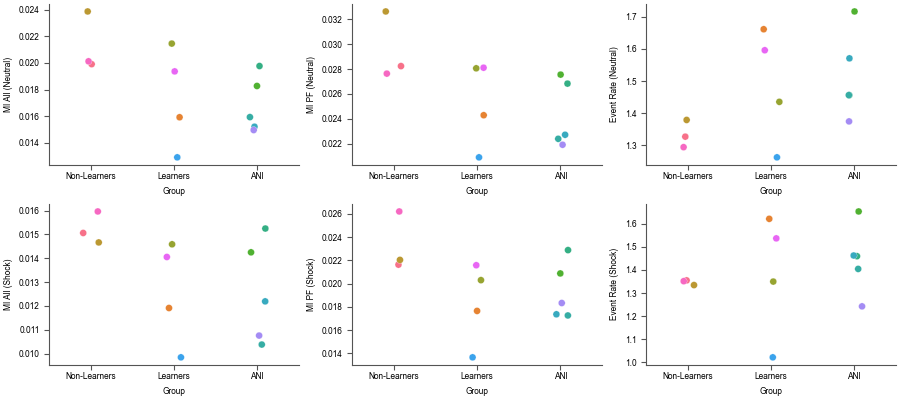

In [38]:
df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)].groupby(["Mouse"]).mean(numeric_only=True).reset_index().drop(columns="index")
df_use["Group"] = df_use.apply(get_group, axis=1)
_, ax = plt.subplots(2, 3, figsize=(9, 4))
for a, col in zip(ax.T.reshape(-1), ["MI All (Neutral)", "MI All (Shock)", "MI PF (Neutral)",
                                     "MI PF (Shock)", "Event Rate (Neutral)", "Event Rate (Shock)"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False, edgecolor="w",
                  linewidth=0.2)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,ANI,Learners,False,True,-1.042742,12.061788,two-sided,0.317518,0.317518,holm,0.598,-0.490873
1,Group,ANI,Non-Learners,False,True,2.115540,11.624346,two-sided,0.056701,0.113403,holm,1.696,1.003894
2,Group,Learners,Non-Learners,False,True,2.630351,11.734640,two-sided,0.022315,0.066944,holm,3.037,1.243012


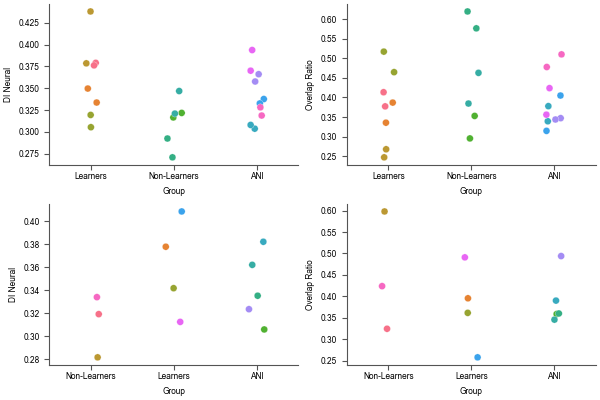

In [39]:
_, ax = plt.subplots(2, 2, figsize=(6, 4))

df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)]

for a, col in zip(ax[0], ["DI Neural", "Overlap Ratio"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False, edgecolor="w",
                  linewidth=0.2)
    
df_use = df_use.groupby(["Mouse"]).mean(numeric_only=True).reset_index().drop(columns="index")
df_use["Group"] = df_use.apply(get_group, axis=1)
for a, col in zip(ax[1], ["DI Neural", "Overlap Ratio"]):
    sns.stripplot(data=df_use, x="Group", y=col, hue="Mouse", ax=a, legend=False, edgecolor="w",
                  linewidth=0.2)

df_use = DI_df[(DI_df.Day == -2) | (DI_df.Day == -1)]
import pingouin as pg
pg.pairwise_tests(data=df_use, dv="DI Neural", between="Group", padjust="holm")
# pg.anova(data=df_use, dv="DI Neural", between="Group")

### 1G: Make behavioral breakdown plots showing DI is different between Learners and Non-Learners/ANI
Note that this is by definition.

In [66]:
DIdf_list = []
for mice, gname in zip([err.learners, err.nonlearners, err.ani_mice_good], ["Learners", "Non-Learners", "ANI"]):
    fratio_all = erp.get_all_freezing(mice, day_des=[-2, -1, 1, 2, 7], arenas=["Open", "Shock"])
    fratio_df = erp.fratio_to_df(fratio_all, mice, days=[-2, -1, 1, 2, 7], arenas=["Neutral", "Shock"])
    DI_df = create_DI_df(fratio_df)
    DI_df["Group"] = gname
    DIdf_list.append(DI_df)
DIdf = pd.concat(DIdf_list, axis=0).reset_index()

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: invalid value encountered in multiply
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarn

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: divide by zero encountered in log
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:607: RuntimeWarning: invalid value encountered in multiply
  i_k1 = p1xtemp * np.log(p1xtemp / p_k1[neuron])  # Lots of nans - why?
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: divide by zero encountered in log2
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:618: RuntimeWarning: invalid value encountered in multiply
  isec.append(np.nansum(p1xtemp * p_x * np.log2(p1xtemp / p_k1[neuron])))
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: RuntimeWarning: divide by zero encountered in log
  i_k0 = p0xtemp * np.log(p0xtemp / p_k0[neuron])  # All good values
/Users/nkinsky/Documents/BU/GitHub/Eraser/Placefields.py:608: Runtim

In [67]:
axDIaft, axDIaft_stats = Fig1comb.subplot([Fig1.gs[2, 2], Fig1stats.gs[2, 2]])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2))]
sns.stripplot(x='Group', y='DI', data=DIaft, ax=axDIaft, palette='Set2', size=3)
axDIaft.set_title('After: Days 1 and 2')
axDIaft.set_ylabel('$DI_{beh}$')

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_33086/720791049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='DI', data=DIaft, ax=axDIaft, palette='Set2', size=3)


Text(0, 0.5, '$DI_{beh}$')

Run stats on this plot

In [68]:
tstat_aft_ln, p_aft_ln = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'Non-Learners'].DI)
tstat_aft_la, p_aft_la = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)
tstat_aft_na, p_aft_na = s.ttest_ind(DIaft[DIaft.Group == 'Non-Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)

axDIaft_stats = Fig1stats.subplot(346)
groups = ['L v NL', 'L v ANI', 'NL v ANI']
axDIaft_stats.text(0.1, 0.7, '1-sided t-test DIbehavior bw groups days 1 and 2 All POINTS (Old method, not used)')

# Old method - use all points, not good
ytext = 0.6
for grp, tstat, p in zip(groups, [tstat_aft_ln, tstat_aft_la, tstat_aft_na], [p_aft_ln, p_aft_la, p_aft_na]):
    puse = p/2 if tstat < 0 else 1 - p/2
    axDIaft_stats.text(0.1, ytext, f'{grp}: p={puse:0.3g} w/tstat={tstat:0.3g}')
    ytext -= 0.1

# new method: use mean values for each mouse
# DIaft = DI_df[((DI_df['Day'] == 1) | (DI_df['Day'] == 2))]
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2))]
DIaft_mean = DIaft.drop(columns=["Day"]).groupby(["Group", "Mouse"]).mean().reset_index()

axDIaft_stats.text(0.1, 0.4, '1-sided t-test DIbehavior bw groups days 1 and 2 MEAN (New method, used)')
axDIaft_stats.text(0.1, 0.1, pg.pairwise_tests(data=DIaft_mean, between="Group", dv="DI"))

print(0.1, 0.4, '1-sided t-test DIbehavior bw groups days 1 and 2 MEAN (New method, used)')
print(0.1, 0.1, pg.pairwise_tests(data=DIaft_mean, between="Group", dv="DI"))

0.1 0.4 1-sided t-test DIbehavior bw groups days 1 and 2 MEAN (New method, used)
0.1 0.1   Contrast         A             B  Paired  Parametric         T       dof  \
0    Group       ANI      Learners   False        True  1.827626  5.598042   
1    Group       ANI  Non-Learners   False        True  0.048804  4.643388   
2    Group  Learners  Non-Learners   False        True -3.558076  4.709881   

  alternative     p-unc   BF10    hedges  
0   two-sided  0.120897  1.202  0.997886  
1   two-sided  0.963104  0.532  0.023911  
2   two-sided  0.017968  3.783 -2.084618  


### Calculations: Get cell overlap between arenas for each day and dump into DI dataframe.

In [69]:
# Generate cell overlap
olap_list = []
for idr, row in DIdf.iterrows():
    _, _, overlap, _, _ = pfs.get_overlap(row['Mouse'], 'Shock', row['Day'], 'Open', row['Day'])
    olap_list.append(overlap)
DIdf.insert(2, 'Cell Overlap', olap_list)

placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


In [70]:
# Generate cell discrimination score
DImean_list = []
for idr, row in DIdf.iterrows():
    DIneurons = discr.get_DI_scores(row['Mouse'], 'Open', row['Day'], 'Shock', row['Day'])
    DImean_list.append(np.mean(np.abs(DIneurons)))
DIdf.insert(3, '|DI|mean', DImean_list)

### 1H (Original submittal 1G final): Plot DIneuron by group BEFORE shock

#### Old Method - many data points aren't independent
kept for reference since included in first submittal

In [45]:
axDIbef, axDIbef_stats = Fig1comb.subplot([Fig1.gs[2, 3], Fig1stats.gs[2, 3]])
DIbef = DIdf[((DIdf['Day'] == -2) | (DIdf['Day'] == -1))]
sns.stripplot(x='Group', y='|DI|mean', data=DIbef, ax=axDIbef, palette='Set2', size=3)
fix_xticks(axDIbef,['Learners', 'Non-Learners', 'ANI'])
axDIbef.set_title('Before: Days -2 and -1')
axDIbef.set_ylabel(r"$\overline{|DI_{neural}|}$")

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_33086/2837610223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='|DI|mean', data=DIbef, ax=axDIbef, palette='Set2', size=3)


Text(0, 0.5, '$\\overline{|DI_{neural}|}$')

In [46]:
# axDIbef_stats = Fig1stats.subplot(Fig1stats.gs[2, 1])
statb_ln, pb_ln = s.ttest_ind(DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])
statb_an, pb_an = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'])
statb_la, pb_la = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'],
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])

axDIbef_stats.text(0.1, 0.8, 'two-sided t-test abs(DIneural)_mean BEFORE shock days')
axDIbef_stats.text(0.1, 0.7, f'NL vs. L p={pb_ln:0.3g} w/tstat={statb_ln:0.3g}')
axDIbef_stats.text(0.1, 0.6, f'NL vs. ANI p={pb_an:0.3g} w/tstat={statb_an:0.3g}')
axDIbef_stats.text(0.1, 0.5, f'ANI vs. L p={pb_la:0.3g} w/tstat={statb_la:0.3g}')
print(pb_ln)
print(pb_an)
print(pb_la)

0.030118915965494614
0.05890575797380454
0.29331620835835526


### 1G: Correct method - uses hierarchical bootstrapping
See 'behavior_and_neural_discrimination_bootstrap.ipynb'

### Finally generate some example traces of on/off neurons and highly discriminative neurons

In [47]:
import scipy.io as sio
traces = []
for arena in ['Open', 'Shock']:
    dir_use = pf.get_dir('Marble11', arena, -1)
    im_data_file = path.join(dir_use, 'FinalOutput.mat')
    im_data = sio.loadmat(im_data_file)
    traces.append(im_data['NeuronTraces'])

traces_o = traces[0][0,0].squeeze()[0]
traces_s = traces[1][0,0].squeeze()[0]

For notebook only - as a reference to make sure sorting is working properly (it is!)

<Axes: >

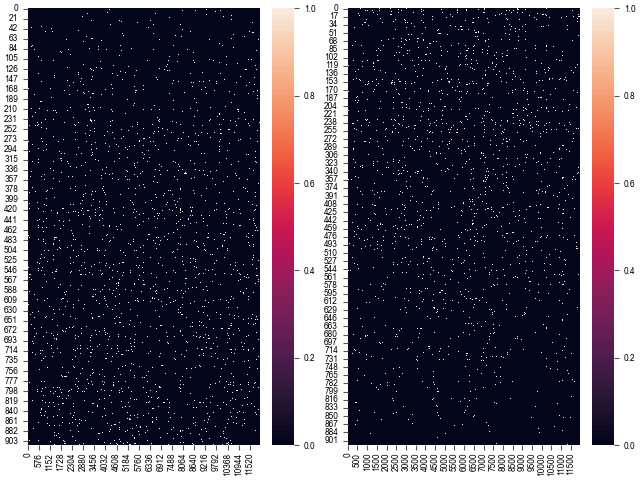

In [48]:
_, axtest = plt.subplots(1, 2)
day = -1

# Import calcium activity
traces_o, psa_o = trc.load_traces('Marble11', 'Open', day, psa=True)
traces_s, psa_s = trc.load_traces('Marble11', 'Shock', day, psa=True)
neuron_map = pfs.get_neuronmap('Marble11', 'Open', day, 'Shock', day)

# Keep only neurons active in both sessions
neuron_map_base = np.where(neuron_map >= 0)
neuron_map_reg = neuron_map[neuron_map >= 0]
psa_o2 = psa_o[neuron_map_base]
psa_s2 = psa_s[neuron_map_reg]
traces_o2 = traces_o[neuron_map_base]
traces_s2 = traces_s[neuron_map_reg]

# Calculate and sort by DI
DIneuron = discr.get_DI_scores('Marble11', 'Open', day, 'Shock', day)
iDI = np.argsort(DIneuron)

# Plot each
sns.heatmap(psa_o2[iDI], ax=axtest[0])
sns.heatmap(psa_s2[iDI], ax=axtest[1])

### 1F: Plot traces of neurons highly active in one arena vs the other.

In [49]:
ax00 = Fig1.subplot(Fig1.gs[2, 0])
ax01 = Fig1.subplot(Fig1.gs[2, 1])
ax10 = Fig1.subplot(Fig1.gs[3, 0])
ax11 = Fig1.subplot(Fig1.gs[3, 1])

# This will need to go into 4 separate sub-plots. Trying to cram this into one subplot looks terrible.
# subfig = Fig1.add_subfigure(Fig1.gs[1:, 0])
# axtest = subfig.subplots(2, 2)

plt.rcParams['lines.linewidth'] = 0.5
trc.plot_traces(traces_o2[iDI][0:6], psabool=psa_o2[iDI][0:6], normalize_traces=True, SR=20, ax=ax00)
ax00.set_title('Neutral Arena')
for a in [ax00, ax01]:
    sns.despine(ax=a, bottom=True)
    a.axes.xaxis.set_visible(False)
trc.plot_traces(traces_s2[iDI][0:6], psabool=psa_s2[iDI][0:6], normalize_traces=True, SR=20, ax=ax01)
ax01.set_title('Shock Arena')
trc.plot_traces(traces_o2[iDI][-6:], psabool=psa_o2[iDI][-6:], normalize_traces=True, SR=20, ax=ax10)
trc.plot_traces(traces_s2[iDI][-6:], psabool=psa_s2[iDI][-6:], normalize_traces=True, SR=20, ax=ax11)
for a in [ax01, ax11]:
    sns.despine(ax=a, left=True)
    a.axes.yaxis.set_visible(False)
sns.despine(ax=ax01, bottom=True, left=True)

ax00.set_ylabel('Shock preferring \n dF/F (au)')
ax10.set_ylabel('Neutral preferring \n dF/F (au)')

Text(0, 0.5, 'Neutral preferring \n dF/F (au)')

### 1D: Last, plot neuron outlines active in one arena versus the other.

In [50]:
# Learner example - Marble24
axroi_lrn = Fig1.subplot(445)
trc.plot_ROIs_bw_sessions('Marble24', 'Open', -1, 'Shock', -1, ax=axroi_lrn)
axroi_lrn.set_title('Learner')

# Non-Learner example - Marble29
axroi_nl = Fig1.subplot(446)
trc.plot_ROIs_bw_sessions('Marble29', 'Open', -2, 'Shock', -2, ax=axroi_nl)
axroi_nl.set_title('Non-Learner')

No _tform.csv file found for this pair of sessions. Check directory and create in MATLAB to run.
Plotting without transforming second session ROIs, be warned!
No _tform.csv file found for this pair of sessions. Check directory and create in MATLAB to run.
Plotting without transforming second session ROIs, be warned!


Text(0.5, 1.0, 'Non-Learner')

### Misc supplemental plots here

In [51]:
# ANI DI ratios - Plot into supplemental
ahista = FigS1.subplot(344)
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

ahista.hist(DI_aft_ani, histtype='step')
ahista.set_title('ANI: After')
ahista.set_xlabel('$DI_{beh}$')

Text(0.5, 0, '$DI_{beh}$')

### S1B: DI ratios + Learner/Non-Learner cutoff for control mice

In [52]:
# Plot Discrimination Index (DI) ratios for day 1-2 for control mice
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# subfighist = Fig1.fig.add_subfigure(Fig1.gs[1, 0])
# ahist = subfighist.subplots(1, 2, sharey=True)
ahist = FigS1.subplot(343)
_, bins, cbar = ahist.hist(DI_aft, 6)
ahist.set_ylabel('Count')
ahist.set_xlabel('$DI_{beh}$')
ahist.axvline(learning_cutoff, linestyle='--', color='k')

# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

### S1D: Reviewer question: Is freezing in shock box correlated with freezing in the control box?

In [53]:
days = [-2, -1, 4, 1, 2, 7]
df_list = []
for mouse in err.control_mice_good:
    fratios = erp.get_all_freezing(mouse, day_des=days, arenas=["Open", "Shock"])
    df = pd.DataFrame({"Mouse": mouse, "Day": days, "Open": fratios[0, :], "Shock": fratios[1, :]})
    # df_list.append(df.melt(id_vars=["Mouse", "Day"], value_vars=["Open", "Shock"], var_name="Arena", value_name="Frz Ratio"))
    
    df_list.append(df)
df_frz = pd.concat(df_list).reset_index().drop(columns="index")
df_frz = df_frz[~np.isnan(df_frz.Open)]  # Exclude animals with missing data from EITHER arena
# Make animal markers plot consistently
df_frz["Mouse"] = pd.Categorical(df_frz["Mouse"], df_frz["Mouse"].unique())
df_frz.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


,Mouse,Day,Open,Shock
44,Marble29,4,0.247255,0.615316
14,Marble11,4,0.036107,0.170080
28,Marble14,2,0.004829,0.052093
20,Marble12,4,0.194702,0.458148
9,Marble07,1,0.157452,0.434550


/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


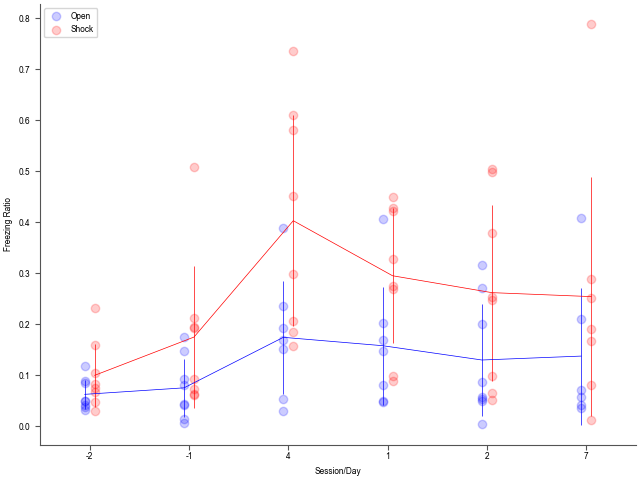

In [54]:
_, _, df_frz2 = erp.plot_all_freezing(err.control_mice_good, days=days, return_df=True)
df_frz2["Group"] = df_frz2.apply(get_group, axis=1)  # Add in group names

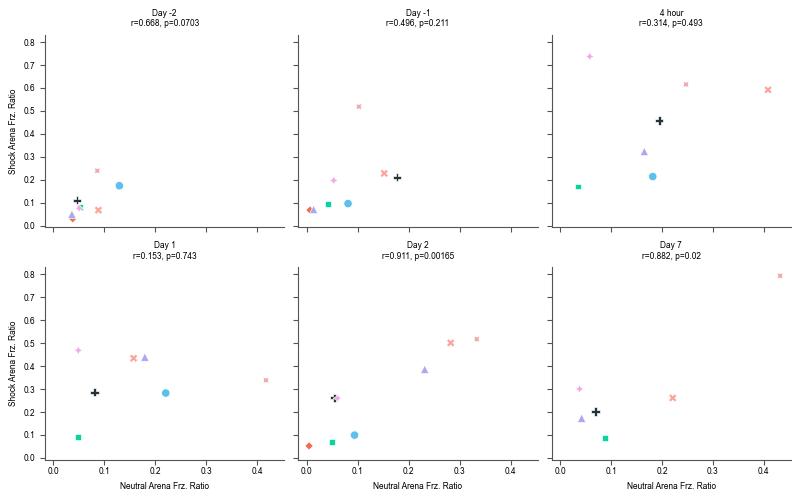

In [55]:
fig, ax = plt.subplots(2, 3, figsize=(8,5), tight_layout=True, sharex=True, sharey=True)
# sns.set(font_scale=1)
for day, a in zip(days, ax.reshape(-1)):
    df_day = df_frz[df_frz.Day == day]
    sns.scatterplot(data=df_day, x="Open", y="Shock", style="Mouse", hue="Mouse", ax=a, legend=False)
    a.set_xlabel("Neutral Arena Frz. Ratio")
    a.set_ylabel("Shock Arena Frz. Ratio")
    # a.set_xticklabels(a.get_xticklabels(), fontsize=10)

    # Run stats
    df_good = df_day[~np.isnan(df_day.Open)]
    res = s.linregress(df_good.Open, df_good.Shock)
    day_str = " ".join(["Day", str(day)]) if day != 4 else "4 hour"
    a.set_title(f"{day_str}\nr={res.rvalue:.3g}, p={res.pvalue:.3g}")
    
sns.despine(fig=fig)

In [56]:
def fix_xlabels(axbad, session_names=True, rotate=False):
    if session_names:
        axbad.set_xticks(axbad.get_xticks())
        axbad.set_xticklabels([f"Day {_.get_text()}" if _.get_text() != '4' else "4 Hour" for _ in axc.get_xticklabels()], ha="right")
    if rotate:
        axbad.tick_params(axis="x", labelrotation=30)
    axbad.set_xlabel('Session')

### Fig S1E

[8.5 6.5]


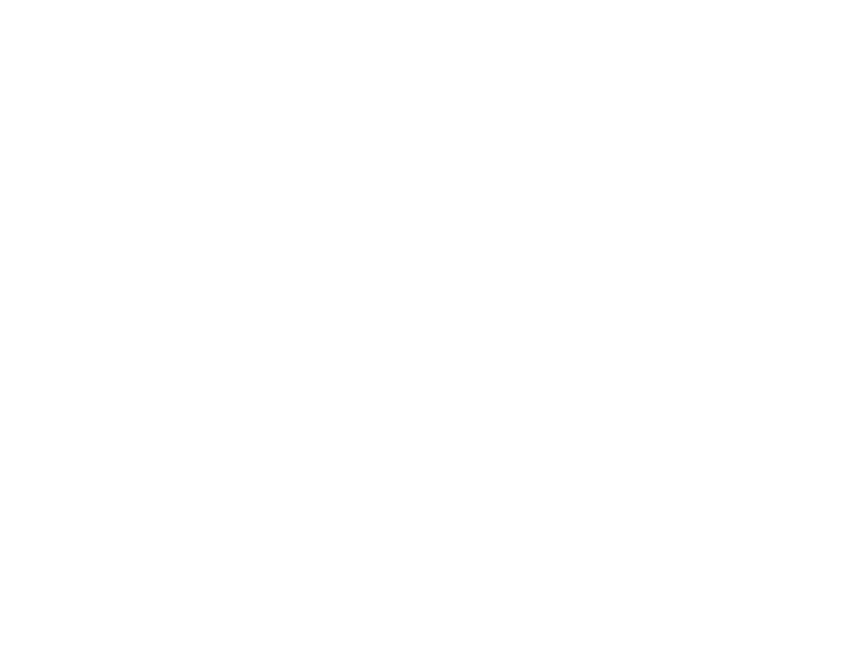

In [57]:
# %matplotlib ipympl
FigR1 = Fig(num="Reviewer1", grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(FigR1.fig.get_size_inches())

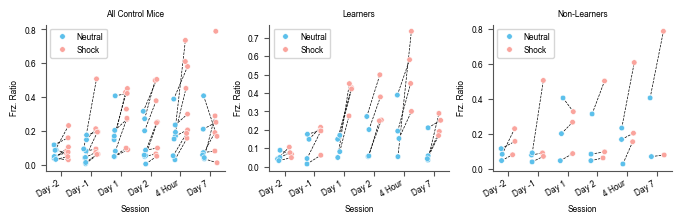

In [58]:
# figcc, axcc = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)
from plotting import fix_open_legend
aall = FigR1.subplot(441)
alrn = FigR1.subplot(442)
anl = FigR1.subplot(443)
figcc, axcc = FigR1.fig, [aall, alrn, anl]

axc = axcc[0]
sns.stripplot(data=df_frz2, x='Day', y ='Frz. Ratio', hue="Arena", dodge=True, size=4, linewidth=0.4, edgecolor='w', ax=axc)

for idd, day in enumerate(days):
    for (x0, y0), (x1, y1) in zip(axc.collections[idd*2].get_offsets(), axc.collections[idd*2+1].get_offsets()):
        axc.plot([x0, x1], [y0, y1], ls='--', color='black')
axc.set_title("All Control Mice")

for axc, grp in zip(axcc[1:], ["Learners", "Non-Learners"]):
    df_use = df_frz2[df_frz2.Group == grp]
    sns.stripplot(data=df_use, x='Day', y ='Frz. Ratio', hue="Arena", dodge=True, size=4, linewidth=0.4, edgecolor='w', ax=axc)

    for idd, day in enumerate(days):
        for (x0, y0), (x1, y1) in zip(axc.collections[idd*2].get_offsets(), axc.collections[idd*2+1].get_offsets()):
            axc.plot([x0, x1], [y0, y1], ls='--', color='black')
    axc.set_title(grp)

[fix_xlabels(axc, rotate=30) for axc in axcc];

sns.despine(fig=figcc)
fix_open_legend(axcc)
FigR1.fig

### Fig S1G-I: Neural activity statistics between groups before conditioning 
See `behavior_and_neural_discimination_bootstrap.ipynb` notebook

## Save Figures

In [59]:
Fig1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1'), scriptname='Figure1Notebook')

In [60]:
Fig1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1stats'), scriptname='Figure1Notebook')

/Users/nkinsky/Documents/BU/GitHub/Eraser/plotting.py:271: UserWarning: Glyph 27 () missing from current font.
  fig.savefig(filename, dpi=dpi, backend="pdf")


In [61]:
FigS1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS1'), scriptname='Figure1Notebook')

In [62]:
FigS1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS1stats'), scriptname='Figure1Notebook')


In [63]:
FigR1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigR1_generalized_freezing'), scriptname='Figure1Notebook')